# [E-05] Kaggle Starting

> 목차
-


**1. 개요**  
    
    1.1 프로젝트 과정 및 목표  
    1.2 예상되는 문제점  


**2. 루브릭 평가기준**  

**3. Project**
    
    3.1 데이터 준비하기    
    3.2 데이터 전처리  
    3.3 데이터 분리 및 학습시키기  
    3.4 데이터 테스트
**4. 회고**
    
    4.1 결과 평가  
    4.2 어려웠던 점
    4.3 참조
    

---
> **1. 개요**
-

> **1.1 프로젝트 과정 및 목표**

<프로젝트 과정>  
1. Baseline 모델을 가져온다.  
2. 라이브러리, 데이터를 가져온다.  
3. 데이터 분석  
4. 모델 설계  
5. 하이퍼 파라미터 튜닝  
6. 프로젝트 제출 및 리더보드 확인  

<목표>
1. 데이터 전처리를 확실히 해서 시행착오의 범위를 줄이기  
2. 리더보드 안에 들기위해 해야할 다양한 방법이 있지만 그 중 사용할 방법을 제대로 숙지 및 적용

> **1.2 예상되는 문제점**

1. 데이터 전처리가 익숙하지 않아서 적용하는데 어려움이 있을 것 같다.  
2. 라이브러리에 대한 이해가 크지 않아 많은 시행착오를 할 것 같다.

---
> **2. 루브릭 평가기준**
-

|평가문항 | 상세기준|
|:---------|:---------|
|1. 캐글 데이터분석 전과정이 성공적으로 진행되었는가? | 데이터 전처리, 모델학습, 예측의 전체 과정을 거쳐 캐글 submission까지 진행되었다.|
|2. 전처리, 학습과정 및 결과에 대한 설명이 시각화를 포함하여 체계적으로 진행되었는가? | 제출된 노트북이 캐글 커널로 사용될 수 있을 만큼 전처리, 학습, 최적화 진행 과정이 체계적으로 기술되었다.|
|3. 회귀모델 예측정확도가 기준 이상 높게 나왔는가?| 다양한 피처 엔지니어링과 하이퍼 파라미터 튜닝 등의 최적화 기법을 통해 캐글 리더보드의 Private score 기준 110000 이하의 점수를 얻었다.|

---
> **3. Project**
-

> 3.1 데이터 준비하기

In [1]:
# 시각화 그래프가 나타낼 수 있도록 plt import
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [2]:
# plt 외에 라이브러리 import
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Lms에서 사용하기 때문에 사용하는 경로
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv')      # 테스트, 즉 submission 시 사용할 데이터 경로

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

In [4]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


> 3.2 데이터 전처리

In [5]:
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [6]:
# 타겟데이터 삭제
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [7]:
# id 컬럼 삭제
del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [8]:
# 위 과정 반복
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [9]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

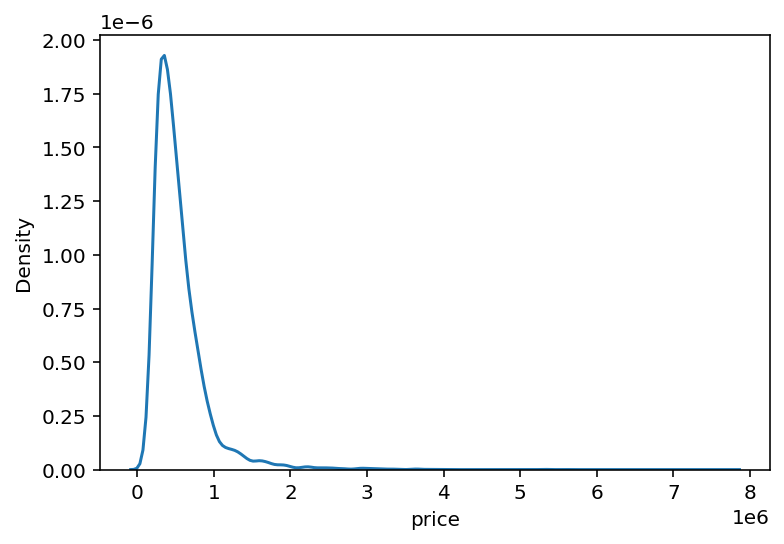

In [10]:
sns.kdeplot(y)
plt.show()

In [11]:
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

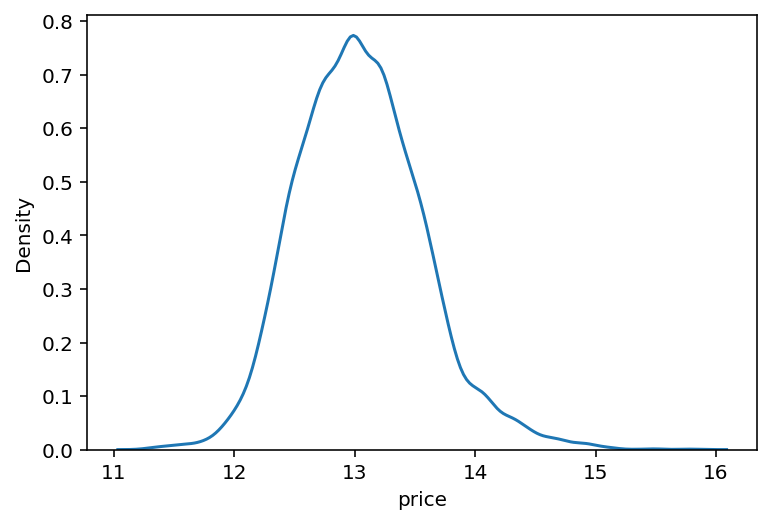

In [12]:
sns.kdeplot(y)
plt.show()

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

> 3.3 데이터 분리 및 학습시키기

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# 대회에서 점수를 매기는 것과 같은 평가 척도 RMSE
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

random_state=42        
gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost,lightgbm, rdforest]

> 3.4 데이터 테스트

In [15]:


def get_scores(models, train, y):
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
            
    return score_df
    


get_scores(models, train, y)

,RMSE
RandomForestRegressor,141074.076029
GradientBoostingRegressor,134486.116210
XGBRegressor,126748.332480
LGBMRegressor,123071.469729


In [16]:
# 그리드 탐색
from sklearn.model_selection import GridSearchCV

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # 모델 fitting
    grid_model.fit(train, y)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [ ]:
# 파라미터 그리드 값
param_grid = {
    'learning_rate': [0.01,0.05,0.1],
    'n_estimators': [1000, 100],
    'max_depth': [10,20,30],

}

model = XGBRegressor( random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

In [48]:
# 하이퍼 파라미터를 따로 빼놓고 조정
params = {}
params['learning_rate'] = 0.05
params['n_estimators'] = 500
params['max_depth'] = 20


In [51]:
model1 = LGBMRegressor(**params, random_state=random_state)
model2 = XGBRegressor(random_state=random_state)
model3 = LGBMRegressor(random_state=random_state)
model4 = RandomForestRegressor(random_state=random_state)

model1.fit(train,y)
model2.fit(train,y)
model3.fit(train,y)
model4.fit(train,y)

pred1=model1.predict(test)
pred2=model2.predict(test)
pred3=model3.predict(test)
pred4=model4.predict(test)

finalpred=(pred1*0.4+pred2*0.2+pred3*0.2+pred4*0.2)
    
prediction = np.expm1(finalpred)
    
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission['price'] = prediction
submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, 'WA', 'rmsle')
submission.to_csv(submission_csv_path, index=False)
print('{} saved!'.format(submission_csv_path))


/aiffel/aiffel/kaggle_kakr_housing/data/submission_WA_RMSLE_rmsle.csv saved!


> **4. 회고**
-

> 4.1 결과 평가

**<1차시도>**  
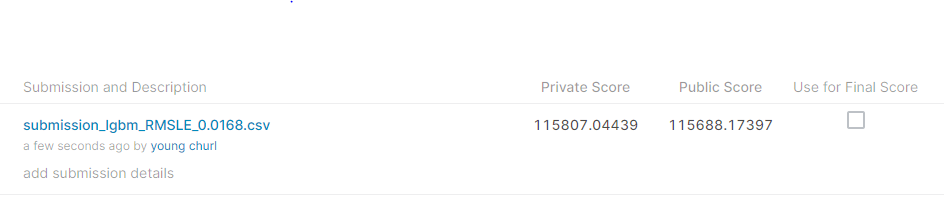
노드진행하면서 아무 데이터도 바꾸지 않은 상태  
조건
- LGBMRegressor (max_depth=10, n_estimators=100)  

115807점으로 대략 6000점을 더 줄여야한다.  

**<2차시도>**
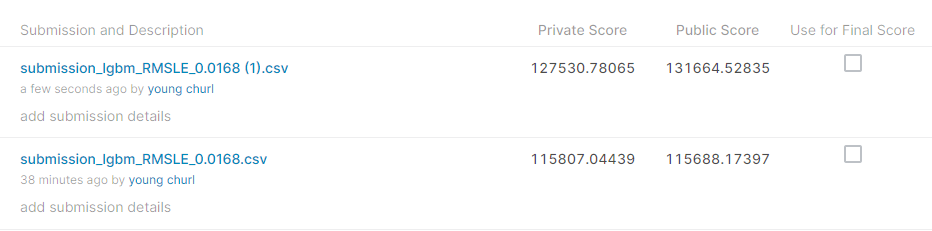
learning_rate와 num_leaves 파라미터를 조정했더니 오히려 값이 떨어졌다...  

**<3차시도>**
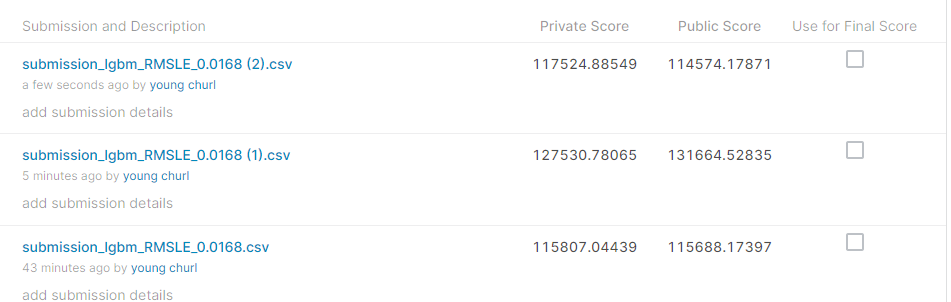
다행히 처음상태로 거의 원상복구 되었으나 아직도 1차시의 private score보단 못하다.  

params['learning_rate'] = 0.05  
params['num_leaves'] = 100  
params['n_estimators'] = 100  
params['max_depth'] = 20  

**7차시도**
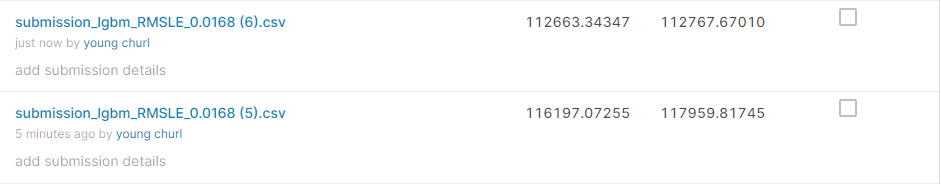
이번에 점수에 유의미한 변화가 없으면 다른 모델로 새로 시도해보려 했는데 큰편차로 줄어듬이 보여서 좀 더 하이퍼 파라미터를 수정해야겠다는 생각이 들었습니다.  

params['learning_rate'] = 0.05  
params['n_estimators'] = 500  
params['max_depth'] = 10  

**8차시도**
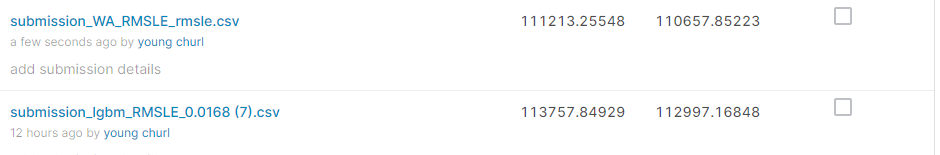
하이퍼 파라미터 조정만으로는 힘들꺼 같다는 생각이 들어서 Weighted Average 기법을 한번 써보기로 생각했습니다.
결과적으로 성공적이었습니다.
무려 11만 천등 정도로 줄어서 천등 정도만 낮추면 얼추 괜찮게 나올거같다는 생각이 들었습니다.

params['learning_rate'] = 0.05  
params['n_estimators'] = 500  
params['max_depth'] = 10  

가중치 각 모델별 0.3, 0.3, 0.4로 설정해서 시험했다. 

**9차시도**
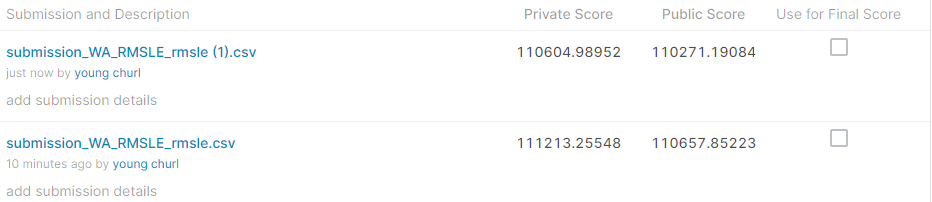
이전 시도에서 힘들게 조율했던 수치가 정확하다 생각해서 0.5의 가중치를 뒀더니 많이 올랐음을 볼 수 있습니다.

params['learning_rate'] = 0.05  
params['n_estimators'] = 500  
params['max_depth'] = 10  

가중치 각 모델별 0.5, 0.3, 0.2로 설정해서 시험했다.

> 4.2 어려웠던 점

생각보다 등 수 올리기가 너무 어려웠습니다...  
결국 600등의 벽을 넘지 못하고 제출하게 됐는데 다른 캐글을 할때는 더 잘할 수 있도록 앙상블에 대해서 좀 더 공부해봐야겠다는 다짐을 했습니다.   
많은 하이퍼 파라미터가 있고 이걸 적절하게 조정해서 원하는 값을 만들어야 하는게 수많은 수행착오를 거쳐야해서 어려움을 느꼈습니다.

> 4.3  참조

하이퍼 파라미터 튜닝에 관해서 - https://nurilee.com/2020/04/03/lightgbm-definition-parameter-tuning/  
weighted average - https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/